<a href="https://colab.research.google.com/github/hinsley/colabs/blob/master/Coronavirus_Projections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install uncertainties

In [0]:
from uncertainties import ufloat

In [0]:
import numpy as np
from uncertainties import unumpy as unp

def sigmoid(x, a=1, b=1, c=1):
  """
  Args:
  - x: Time input.
  - a: Horizontal translation (positive: right).
  - b: Vertical scalar.
  - c: Horizontal scalar.
  """

  result = b * (1-1/(1+np.exp(c * (x - a))))

  return result

def usigmoid(x, a=1, b=1, c=1):
  result = b * (1-1/(1+unp.exp(c * (x - a))))

  return result

In [0]:
# This data begins at February 2, 2020 and is collected from Johns Hopkins
# University's live Coronavirus map.
# https://coronavirus.jhu.edu/map.html

cases_china = np.array([
  17.2e3,   # 2020-02-02
  19.7e3,   # 2020-02-03
  23.7e3,   # 2020-02-04
  27.4e3,   # 2020-02-05
  30.6e3,   # 2020-02-06
  34.1e3,   # 2020-02-07
  36.8e3,   # 2020-02-08
  39.8e3,   # 2020-02-09
  42.3e3,   # 2020-02-10
  44.3e3,   # 2020-02-11
  44.7e3,   # 2020-02-12
  59.8e3,   # 2020-02-13
  66.3e3,   # 2020-02-14
  68.3e3,   # 2020-02-15
  70.4e3,   # 2020-02-16
  72.4e3,   # 2020-02-17
  74.1e3,   # 2020-02-18
  74.5e3,   # 2020-02-19
  75.0e3,   # 2020-02-20
  75.5e3,   # 2020-02-21
  76.9e3,   # 2020-02-22
  76.9e3,   # 2020-02-23
  77.2e3,   # 2020-02-24
  77.7e3,   # 2020-02-25
  78.1e3,   # 2020-02-26
  78.5e3,   # 2020-02-27
  78.8e3,   # 2020-02-28
  79.3e3,   # 2020-02-29
  79.8e3,   # 2020-03-01
  80.0e3,   # 2020-03-02
  80.2e3,   # 2020-03-03
  80.3e3,   # 2020-03-04
  80.4e3,   # 2020-03-05
  80.6e3,   # 2020-03-06
  80.7e3,   # 2020-03-07
  80.7e3,   # 2020-03-08
  80.7e3,   # 2020-03-09
  80.8e3,   # 2020-03-10
  80.9e3,   # 2020-03-11
  80.9e3,   # 2020-03-12
  80.9e3,   # 2020-03-13
  81.0e3,   # 2020-03-14
  81.0e3,   # 2020-03-15
  81.0e3,   # 2020-03-16
  81.0e3,   # 2020-03-17
  81.1e3,   # 2020-03-18
  81.2e3,   # 2020-03-19
  81.3e3,   # 2020-03-20
  81.3e3,   # 2020-03-21
  81.4e3,   # 2020-03-22
])

cases_not_china = np.array([
  18.3e1,   # 2020-02-02
  18.8e1,   # 2020-02-03
  21.2e1,   # 2020-02-04
  22.7e1,   # 2020-02-05
  26.5e1,   # 2020-02-06
  31.7e1,   # 2020-02-07
  34.3e1,   # 2020-02-08
  36.1e1,   # 2020-02-09
  45.7e1,   # 2020-02-10
  47.6e1,   # 2020-02-11
  52.3e1,   # 2020-02-12
  53.8e1,   # 2020-02-13
  59.5e1,   # 2020-02-14
  68.5e1,   # 2020-02-15
  78.0e1,   # 2020-02-16
  89.6e1,   # 2020-02-17
  10.0e2,   # 2020-02-18
  11.0e2,   # 2020-02-19
  12.0e2,   # 2020-02-20
  14.0e2,   # 2020-02-21
  17.0e2,   # 2020-02-22
  20.0e2,   # 2020-02-23
  24.0e2,   # 2020-02-24
  28.0e2,   # 2020-02-25
  33.0e2,   # 2020-02-26
  43.0e2,   # 2020-02-27
  53.0e2,   # 2020-02-28
  68.0e2,   # 2020-02-29
  85.0e2,   # 2020-03-01
  10.3e3,   # 2020-03-02
  12.7e3,   # 2020-03-03
  14.9e3,   # 2020-03-04
  17.5e3,   # 2020-03-05
  21.2e3,   # 2020-03-06
  25.2e3,   # 2020-03-07
  29.1e3,   # 2020-03-08
  32.8e3,   # 2020-03-09
  37.8e3,   # 2020-03-10
  44.9e3,   # 2020-03-11
  47.4e3,   # 2020-03-12
  63.6e3,   # 2020-03-13
  75.1e3,   # 2020-03-14
  81.7e3,   # 2020-03-15
  10.1e4,   # 2020-03-16
  12.1e4,   # 2020-03-17
  13.4e4,   # 2020-03-18
  16.2e4,   # 2020-03-19
  19.1e4,   # 2020-03-20
  22.3e4,   # 2020-03-21
  25.5e4,   # 2020-03-22
])

In [0]:
from matplotlib import pyplot as plt

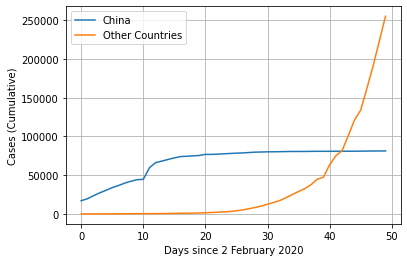

In [5]:
plt.plot(cases_china, label="China")
plt.plot(cases_not_china, label="Other Countries")

plt.grid()
plt.xlabel("Days since 2 February 2020")
plt.ylabel("Cases (Cumulative)")
plt.legend()

plt.show()

In [0]:
from scipy.optimize import curve_fit

# Calculate curve fit for cases *inside* China.
initial_guesses = [0, max(cases_china), 0]
while True:
  try:
    popt_ic, pcov_ic = curve_fit(sigmoid, *zip(*enumerate(cases_china)), p0=initial_guesses)
    break
  except RuntimeError: # Couldn't optimize after 800 adjustments...
    initial_guesses[1] = (initial_guesses[1] + 1) * 1.5

u_popt_ic = [ufloat(*val_pair) for val_pair in zip(popt_ic, np.sqrt(np.diag(pcov_ic)))]

curve_china = lambda x: usigmoid(x, *u_popt_ic)

# Calculate curve fit for cases *outside* of China.
initial_guesses = [0, max(cases_not_china), 0]
while True:
  try:
    popt_oc, pcov_oc = curve_fit(sigmoid, *zip(*enumerate(cases_not_china)), p0=initial_guesses) ##### Remove [:-1] on 2020-03-19! #####
    break
  except RuntimeError: # Couldn't optimize after 800 adjustments...
    initial_guesses[1] = (initial_guesses[1] + 1) * 1.5

u_popt_oc = [ufloat(*val_pair) for val_pair in zip(popt_oc, np.sqrt(np.diag(pcov_oc)))]
curve_not_china = lambda x: usigmoid(x, *u_popt_oc)

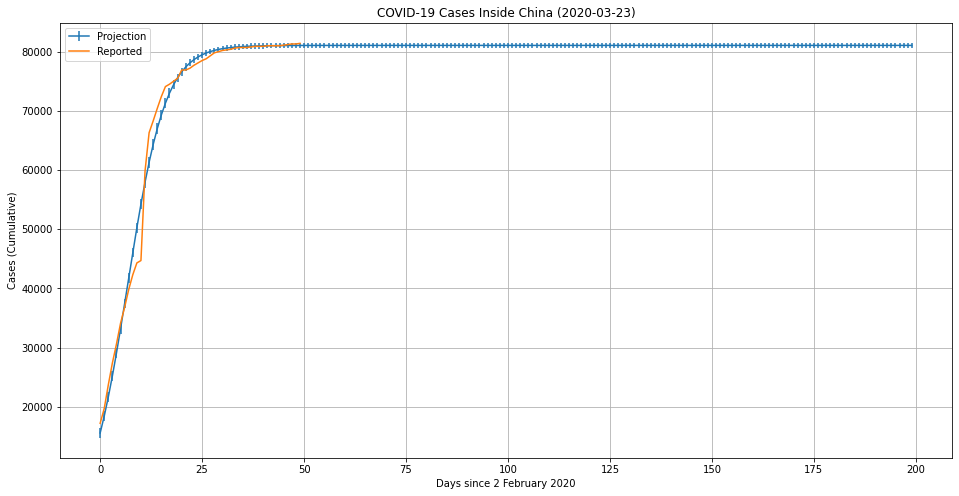

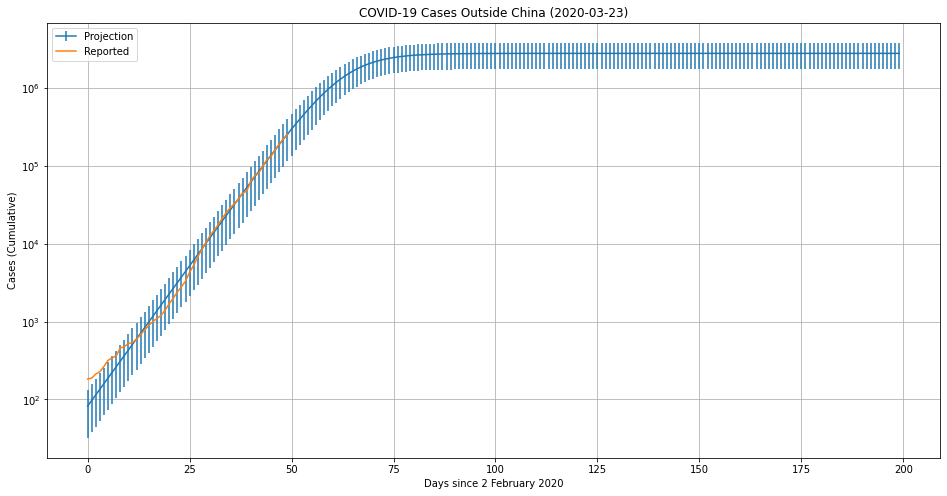

In [7]:
from datetime import date

# Prediction for inside China.
plt.figure(figsize=(16, 8))
u_ys = [curve_china(x) for x in range(200)]
plt.errorbar(x=range(len(u_ys)), y=[u_y.nominal_value for u_y in u_ys], yerr=[u_y.std_dev for u_y in u_ys], label="Projection")
plt.errorbar(x=range(len(cases_china)), y=cases_china, label="Reported")

plt.title(f"COVID-19 Cases Inside China ({date.today()})")
plt.grid()
plt.xlabel("Days since 2 February 2020")
plt.ylabel("Cases (Cumulative)")
plt.legend()

plt.show()

# Prediction for outside China.
plt.figure(figsize=(16, 8))
u_ys = [curve_not_china(x) for x in range(200)]
plt.errorbar(x=range(len(u_ys)), y=[u_y.nominal_value for u_y in u_ys], yerr=[u_y.std_dev for u_y in u_ys], label="Projection")
plt.errorbar(x=range(len(cases_not_china)), y=cases_not_china, label="Reported")

plt.title(f"COVID-19 Cases Outside China ({date.today()})")
plt.grid()
plt.xlabel("Days since 2 February 2020")
plt.ylabel("Cases (Cumulative)")
plt.yscale("symlog")
plt.legend()

plt.show()


# Finding projective maximum spread rate

$\sigma = b \left(1 - \frac{1}{1 + e^{c(x - a)}}\right)$

The maximum spread rate can be found by the spread rate $\sigma_x(x_\text{inflection})$ where
$\sigma_{xx}(x_\text{inflection}) = 0$.

$\sigma_x = -b \frac{\partial}{\partial x} \frac{1}{1+e^{c(x-a)}}$

$= b \frac{1}{(1+e^{c(x-a)})^2} \frac{\partial}{\partial x}(1+e^{c(x-a)})$

$= \frac{b}{(1+e^{c(x-a)})^2e^{ac}} \frac{\partial}{\partial x}(e^{cx})$

$= bc \frac{e^{c(x-a)}}{(1+e^{c(x-a)})^2}$

$= bc \frac{1 + e^{c(x-a)} - 1}{(1+e^{c(x-a)})^2}$

$= bc \left( \frac{1}{1 + e^{c(x-a)}} - \frac{1}{(1+e^{c(x-a)})^2} \right)$

$= bc \frac{1}{1+e^{c(x-a)}} \left( 1 - \frac{1}{1+e^{c(x-a)}} \right)$

$\sigma_x = \frac{c}{b} \sigma (b - \sigma)$

$\sigma_{xx} = \frac{c}{b} \frac{\partial}{\partial x}\left[\sigma(b-\sigma)\right]$

$= \frac{c}{b} \left[ \sigma_x (b - \sigma) - \sigma \sigma_{x} \right]$

$\sigma_{xx} = c (\sigma_x - \frac{2}{b}\sigma \sigma_x)$

From this derivation we can tell that the following equation must be true at the inflection point:

$\sigma_x = \frac{2}{b} \sigma \sigma_x$

$\sigma = \frac{b}{2}$

Returning to our definition of $\sigma$, we now have that:

$e^{c(x-a)} = 1$

and thus $x = a$, indicating that the maximum spread rate will be $\sigma_x(a)$.


In [0]:
def usigmoid_derivative(x, a, b, c):
  sigma = usigmoid(x, a, b, c)

  return c/b * sigma * (b - sigma)

def max_daily_growth_rate(a, b, c):
  return usigmoid_derivative(a, a, b, c)

In [9]:
from datetime import datetime, timedelta

# Parameters for curve projecting cases inside China.
ic = {
    "a": u_popt_ic[0],
    "b": u_popt_ic[1],
    "c": u_popt_ic[2],
}

# Parameters for curve projecting cases outside China.
oc = {
    "a": u_popt_oc[0],
    "b": u_popt_oc[1],
    "c": u_popt_oc[2],
}

day_zero = datetime(2020, 2, 2, 0, 0)

max_growth_date_ic = day_zero + timedelta(days=int(ic["a"].nominal_value))
max_growth_date_oc = day_zero + timedelta(days=int(oc["a"].nominal_value))

print(f"""
Maximum Projected Growth Rate:
  - {max_daily_growth_rate(*u_popt_ic)} new cases inside China on {max_growth_date_ic.strftime("%-d %B %Y")}.
  - {max_daily_growth_rate(*u_popt_oc)} new cases outside China on {max_growth_date_oc.strftime("%-d %B %Y")}.
""".strip("\n"))

Maximum Projected Growth Rate:
  - (4.34+/-0.17)e+03 new cases inside China on 8 February 2020.
  - (1.2+/-0.4)e+05 new cases outside China on 4 April 2020.


In [10]:
import math

print(f"""
Total Projected Cases:
  - {ic['b']} inside China.
  - {oc['b']} outside China.
""".strip("\n"))

Total Projected Cases:
  - (8.11+/-0.05)e+04 inside China.
  - (2.8+/-1.0)e+06 outside China.


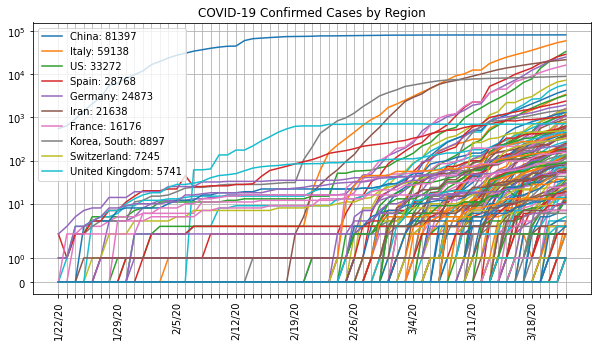

In [11]:
import pandas as pd


ts_confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")

ts_only_confirmed_df = ts_confirmed_df.drop(["Lat", "Long"], axis=1).groupby("Country/Region").sum().sort_values(list(ts_confirmed_df)[-1], ascending=False)


plt.figure(figsize=(10, 5))

ax = plt.subplot()


plt.title("COVID-19 Confirmed Cases by Region")

ax.grid(which="major")
plt.xticks(rotation="vertical")

legend_size = 10

i = 0
for region in ts_only_confirmed_df.index:
  ax.plot(ts_only_confirmed_df.loc[region], label=(f"{region}: {ts_only_confirmed_df.loc[region][-1]}" if i < legend_size else None))
  i += 1

ax.legend()
plt.yscale("symlog")

i = 0
for label in ax.xaxis.get_ticklabels():
  if i % 7 != 0:
    label.set_visible(False)
  i += 1

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


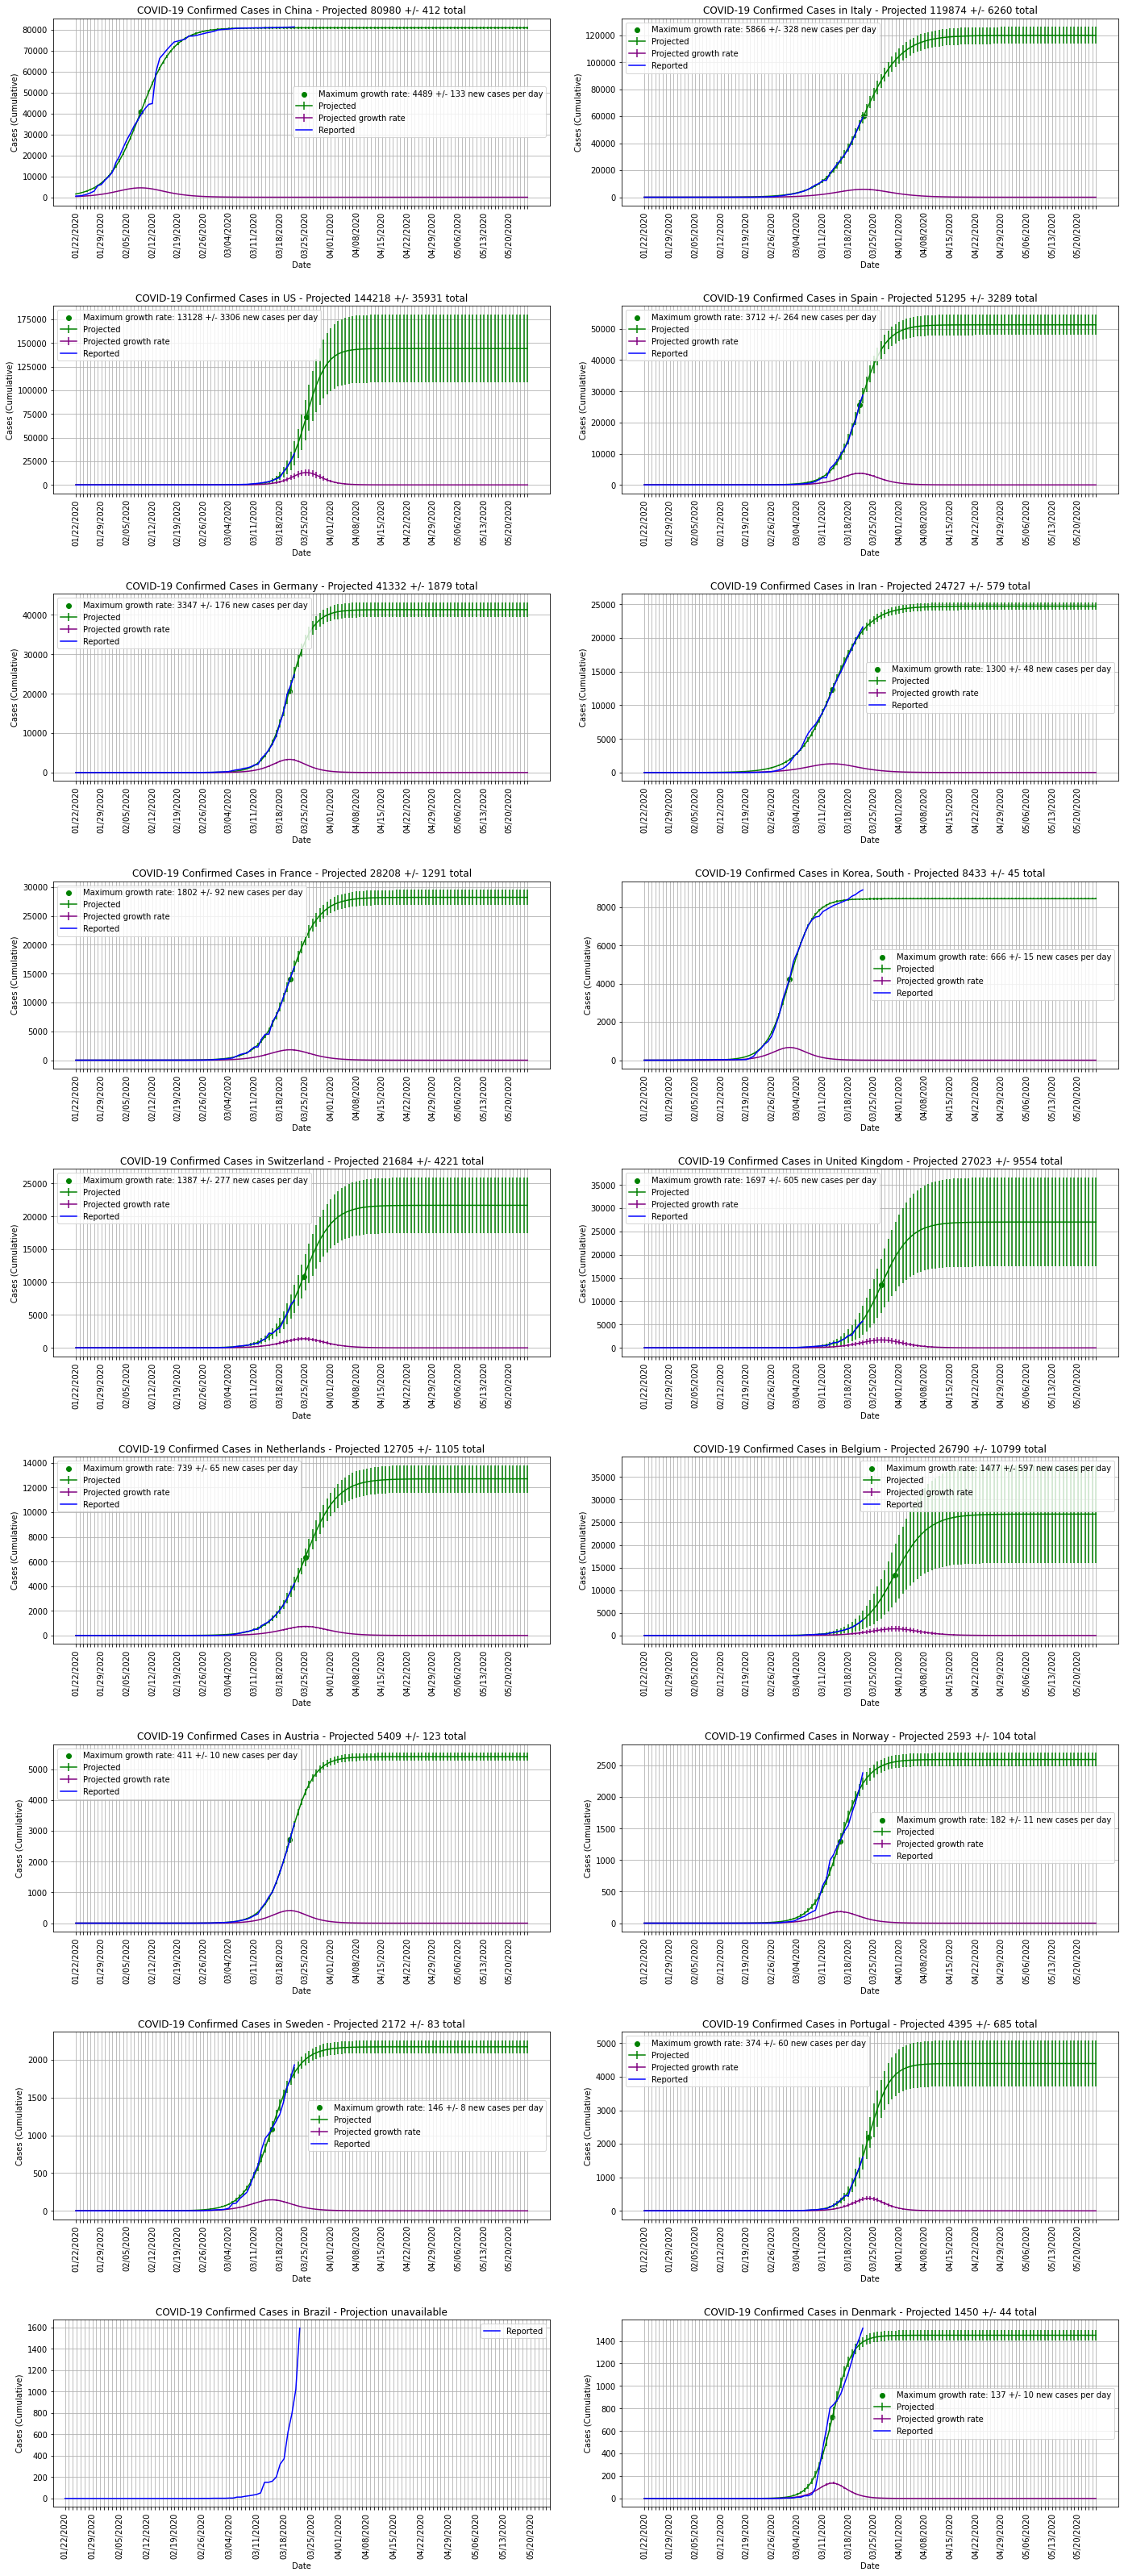

In [12]:
plot_top_n_countries = 18

columns = 2
scaling = 10, 5

ts_plot_df = ts_only_confirmed_df[:min(plot_top_n_countries, len(ts_only_confirmed_df))]

rows = math.ceil(len(ts_plot_df)/columns)
fig, axs = plt.subplots(rows, columns,
                        figsize=(columns * scaling[0], rows * scaling[1]))

min_a = 0

subplot = 0
for region in ts_plot_df.index:
  current_ax = axs[math.floor(subplot/columns), subplot % columns]
  subplot += 1

  regional_ts = ts_plot_df.loc[region]

  initial_guesses = [min_a, regional_ts.max()/2, 0]
  while True:
    try:
      popt, pcov = curve_fit(sigmoid, *zip(*enumerate(regional_ts)), p0=initial_guesses)
      break
    except RuntimeError: # Couldn't optimize after 800 adjustments...
      initial_guesses[1] = (initial_guesses[1] + 1) * 1.5
  
  convergent = all([param > 0 for param in popt])
  
  if convergent:
    u_popt = [ufloat(*val_pair) for val_pair in zip(popt, np.sqrt(np.diag(pcov)))]
    curve = lambda x: usigmoid(x, *u_popt)
    
    curve_derivative = lambda x: usigmoid_derivative(x, *u_popt)

  current_ax.set_title(f"COVID-19 Confirmed Cases in {region} - {'Projection unavailable' if not convergent else f'Projected {int(u_popt[1].nominal_value)} +/- {int(u_popt[1].std_dev)} total'}")
  current_ax.set_ylabel("Cases (Cumulative)")
  current_ax.set_xlabel("Date")

  min_a = min(min_a, popt[0])

  days_to_plot = 125

  if convergent:
    u_ys = [curve(day) for day in range(days_to_plot)]
    current_ax.errorbar(x=range(days_to_plot), y=[u_y.nominal_value for u_y in u_ys], yerr=[u_y.std_dev for u_y in u_ys], label="Projected", color="green")
    u_ys_prime = [curve_derivative(day) for day in range(days_to_plot)]
    current_ax.errorbar(x=range(days_to_plot), y=[u_y_prime.nominal_value for u_y_prime in u_ys_prime], yerr=[u_y_prime.std_dev for u_y_prime in u_ys_prime], label="Projected growth rate", color="purple")
    inflection_y = max_daily_growth_rate(*u_popt)
    current_ax.scatter(x=popt[0], y=sigmoid(popt[0], *popt), label=f"Maximum growth rate: {int(inflection_y.nominal_value)} +/- {int(inflection_y.std_dev)} new cases per day", color="green")

  current_ax.errorbar(x=range(len(regional_ts)), y=regional_ts, label="Reported", color="blue")

  plt.setp(current_ax.get_xmajorticklabels(), rotation=90)

  day_zero = datetime(2020, 1, 22, 0, 0)

  current_ax.set_xticks(range(days_to_plot))
  current_ax.set_xticklabels([(day_zero + timedelta(days=x)).strftime("%m/%d/%Y") for x in range(days_to_plot)])

  i = 0
  for label in current_ax.get_xmajorticklabels():
    if i % 7 != 0:
      label.set_visible(False)
    i += 1

  current_ax.grid()
  current_ax.legend()

fig.tight_layout(pad=3)

plt.show()

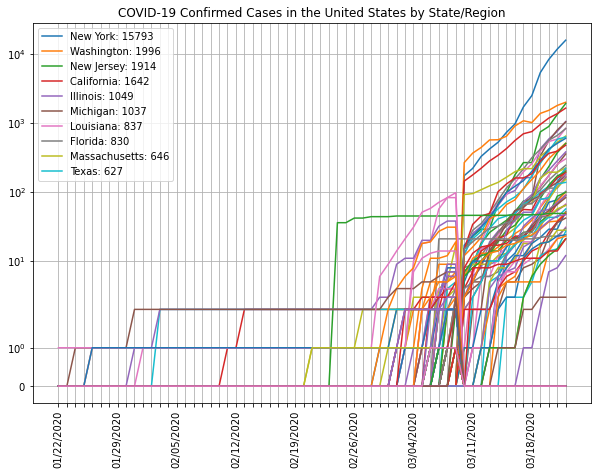

In [13]:
ts_us_confirmed_df = ts_confirmed_df[ts_confirmed_df["Country/Region"] == "US"]

ts_us_confirmed_df = ts_us_confirmed_df.drop(["Country/Region", "Lat", "Long"], axis=1).groupby("Province/State").sum().sort_values(list(ts_us_confirmed_df)[-1], ascending=False)

legend_size = 10
scale = 10, 7

fig, ax = plt.subplots(1, 1, figsize=scale)

i = 0
for area in ts_us_confirmed_df.index:
  ax.plot(ts_us_confirmed_df.loc[area], label=(f"{area}: {ts_us_confirmed_df.loc[area][-1]}" if i < legend_size else None))
  i += 1

plt.yscale("symlog")
ax.grid()

ax.legend()

day_zero = datetime(2020, 1, 22, 0, 0)

ax.set_xticklabels([(day_zero + timedelta(days=x)).strftime("%m/%d/%Y") for x in range(len(ts_us_confirmed_df.columns))])

i = 0
for label in ax.get_xmajorticklabels():
  if i % 7 != 0:
    label.set_visible(False)
  i += 1

plt.setp(ax.get_xmajorticklabels(), rotation=90)

ax.set_title("COVID-19 Confirmed Cases in the United States by State/Region")

plt.show()

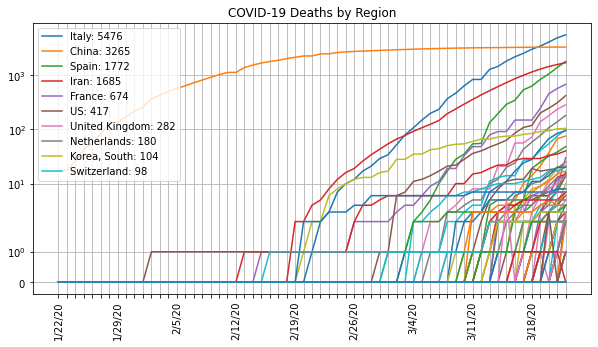

In [14]:
ts_deaths_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")

ts_only_deaths_df = ts_deaths_df.drop(["Lat", "Long"], axis=1).groupby("Country/Region").sum().sort_values(list(ts_deaths_df)[-1], ascending=False)

plt.figure(figsize=(10, 5))

ax = plt.subplot()


plt.title("COVID-19 Deaths by Region")

ax.grid(which="major")
plt.xticks(rotation="vertical")

legend_size = 10

i = 0
for region in ts_only_deaths_df.index:
  ax.plot(ts_only_deaths_df.loc[region], label=(f"{region}: {ts_only_deaths_df.loc[region][-1]}" if i < legend_size else None))
  i += 1

ax.legend()
plt.yscale("symlog")

i = 0
for label in ax.xaxis.get_ticklabels():
  if i % 7 != 0:
    label.set_visible(False)
  i += 1

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


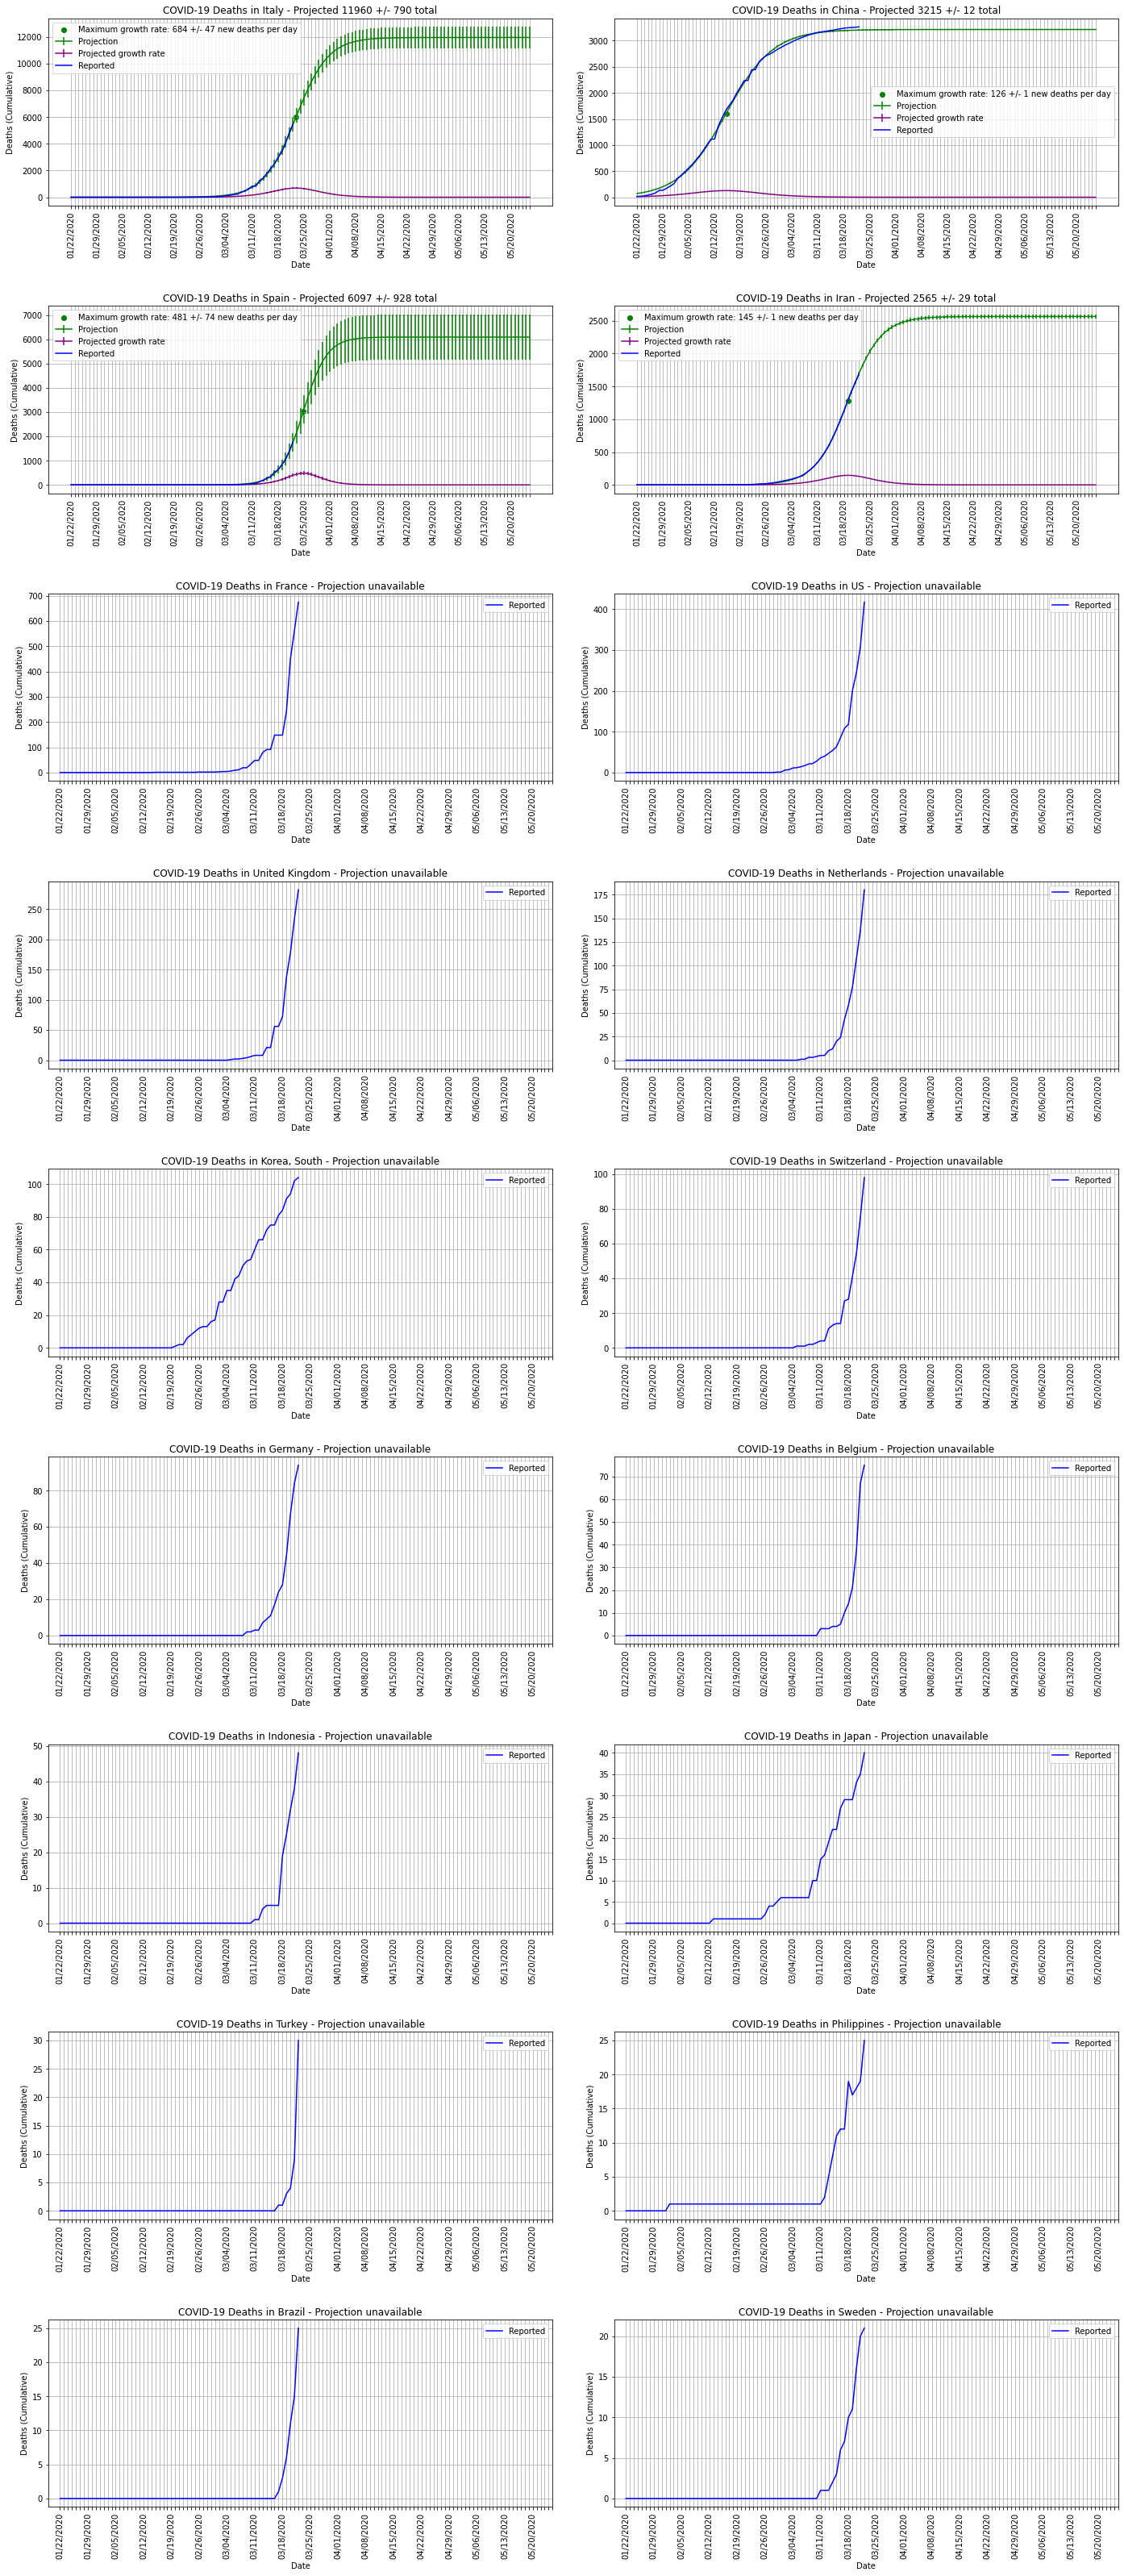

In [15]:
plot_top_n_countries = 18

columns = 2
scaling = 10, 5

ts_plot_df = ts_only_deaths_df[:min(plot_top_n_countries, len(ts_only_deaths_df))]

rows = math.ceil(len(ts_plot_df)/columns)
fig, axs = plt.subplots(rows, columns,
                        figsize=(columns * scaling[0], rows * scaling[1]))

min_a = 0

subplot = 0
for region in ts_plot_df.index:
  current_ax = axs[math.floor(subplot/columns), subplot % columns]
  subplot += 1

  regional_ts = ts_plot_df.loc[region]

  initial_guesses = [min_a, regional_ts.max()/2, 0]
  while True:
    try:
      popt, pcov = curve_fit(sigmoid, *zip(*enumerate(regional_ts)), p0=initial_guesses)
      break
    except RuntimeError: # Couldn't optimize after 800 adjustments...
      initial_guesses[1] = (initial_guesses[1] + 1) * 1.5
  
  u_popt = [ufloat(*val_pair) for val_pair in zip(popt, np.sqrt(np.diag(pcov)))]
  curve = lambda x: usigmoid(x, *u_popt)
  
  curve_derivative = lambda x: usigmoid_derivative(x, *u_popt)

  convergent = all([param > 0 for param in popt])

  current_ax.set_title(f"COVID-19 Deaths in {region} - {'Projection unavailable' if not convergent else f'Projected {int(u_popt[1].nominal_value)} +/- {int(u_popt[1].std_dev)} total'}")
  current_ax.set_ylabel("Deaths (Cumulative)")
  current_ax.set_xlabel("Date")

  min_a = min(min_a, popt[0])

  days_to_plot = 125

  if convergent:
    u_ys = [curve(x) for x in range(days_to_plot)]
    current_ax.errorbar(x=range(days_to_plot), y=[u_y.nominal_value for u_y in u_ys], yerr=[u_y.std_dev for u_y in u_ys], label="Projection", color="green")
    u_ys_prime = [curve_derivative(x) for x in range(days_to_plot)]
    current_ax.errorbar(x=range(days_to_plot), y=[u_y_prime.nominal_value for u_y_prime in u_ys_prime], yerr=[u_y_prime.std_dev for u_y_prime in u_ys_prime], label="Projected growth rate", color="purple")
    inflection_y = max_daily_growth_rate(*u_popt)
    current_ax.scatter(x=popt[0], y=sigmoid(popt[0], *popt), label=f"Maximum growth rate: {int(inflection_y.nominal_value)} +/- {int(inflection_y.std_dev)} new deaths per day", color="green")

  current_ax.errorbar(x=range(len(regional_ts)), y=regional_ts, label="Reported", color="blue")

  plt.setp(current_ax.get_xmajorticklabels(), rotation=90)

  day_zero = datetime(2020, 1, 22, 0, 0)

  current_ax.set_xticks(range(days_to_plot))
  current_ax.set_xticklabels([(day_zero + timedelta(days=x)).strftime("%m/%d/%Y") for x in range(days_to_plot)])

  i = 0
  for label in current_ax.get_xmajorticklabels():
    if i % 7 != 0:
      label.set_visible(False)
    i += 1

  current_ax.grid()
  current_ax.legend()

fig.tight_layout(pad=3)

plt.show()